
# Descriptive Statistics


In this notebook we'll implement, review, and interpret various descriptive statistics including the mean, median, mode, variance, standard deviation, range, covariance and correlation.

In [3]:
# Imports...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [5]:
df[df['dataset'] == "I"]['x'].mean()

9.0

In [6]:
df[df['dataset'] == "II"]['x'].mean()

9.0

In [7]:
df[df['dataset'] == "I"]['x'].describe()

count    11.000000
mean      9.000000
std       3.316625
min       4.000000
25%       6.500000
50%       9.000000
75%      11.500000
max      14.000000
Name: x, dtype: float64

In [8]:
df[df['dataset'] == "II"]['x'].describe()

count    11.000000
mean      9.000000
std       3.316625
min       4.000000
25%       6.500000
50%       9.000000
75%      11.500000
max      14.000000
Name: x, dtype: float64

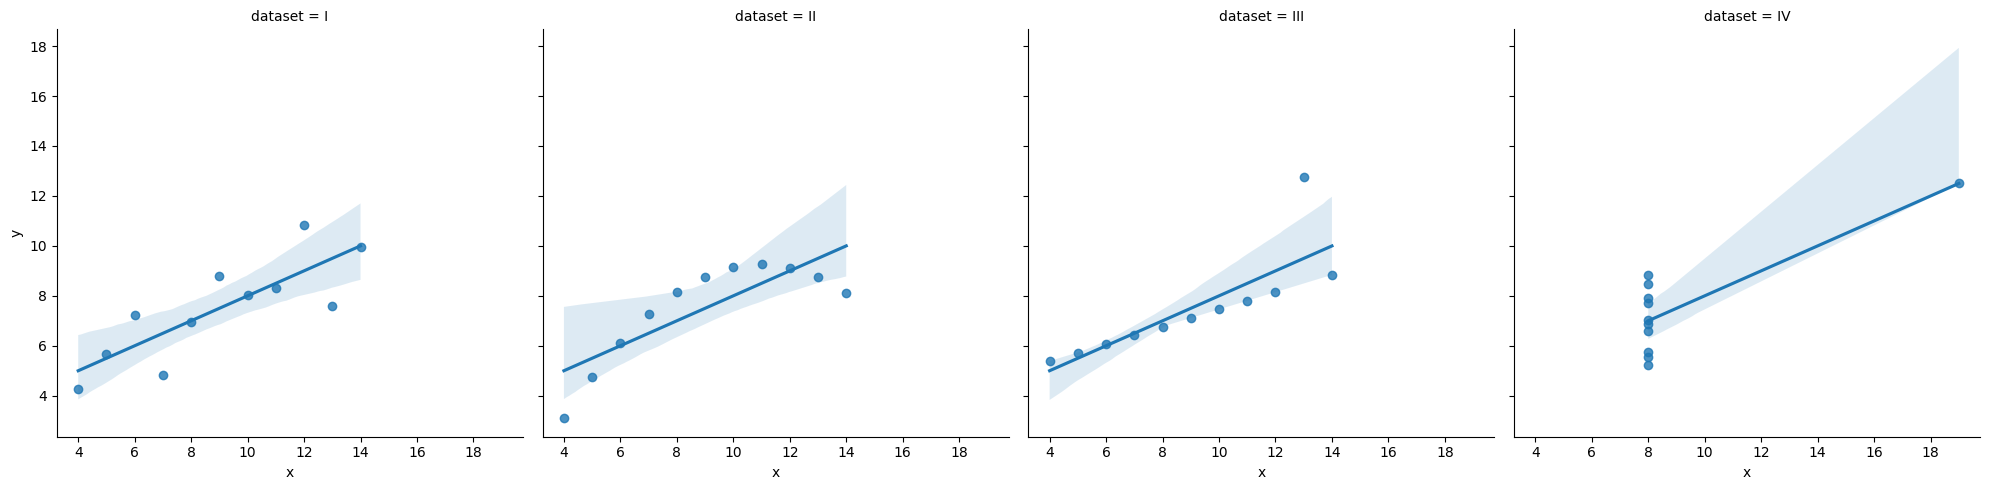

In [12]:
sns.lmplot(data= df, x= 'x', y= 'y', 
           col='dataset')

In [14]:
df['dataset'].value_counts()

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

## Importing the data

In [4]:
df = pd.read_csv('./data/top10s_cleaned.csv')
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Q: How many observations are there? How many variables?

In [17]:
df.shape

(586, 14)

In [24]:
df.dtypes.value_counts()

int64     11
object     3
Name: count, dtype: int64

In [20]:
df.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

## Q: Which variables are categorical, and which variables are quantitative? 

### Categorical:
* title, artist, top genre

### Quantitative:
* all the rest

# Quantitative Statistics

## Mean

What's the mean danciness of these Top 10 songs?

Compute using `pandas`:

In [27]:
df['dnce'].mean()

64.59044368600682

Compute using `numpy`:

In [28]:
np.mean(df['dnce'])

64.59044368600682

Finally, "by hand" using other `numpy` functions:

In [30]:
np.sum(df['dnce']) / len(df['dnce'])

64.59044368600682

In [31]:
def averager(x):
    return np.sum(x) / len(x)

In [36]:
averager(df['dnce'])

64.59044368600682

In [34]:
averager(df['nrgy'])

70.61433447098976

## Median

In [37]:
df['dnce'].median()

66.0

## Skew
Plot the danciness metric. Would you describe this as skew or now? Does the mean vs median disagree?

<Axes: ylabel='Frequency'>

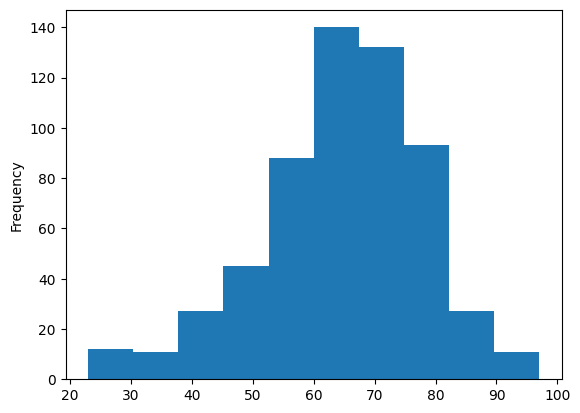

In [39]:
df['dnce'].plot(kind='hist')

(array([ 12.,  11.,  27.,  45.,  88., 140., 132.,  93.,  27.,  11.]),
 array([23. , 30.4, 37.8, 45.2, 52.6, 60. , 67.4, 74.8, 82.2, 89.6, 97. ]),
 <BarContainer object of 10 artists>)

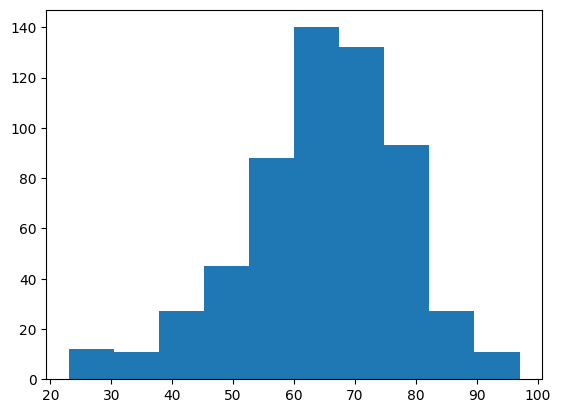

In [40]:
plt.hist(df['dnce'])

Do the same mean vs median plotting for acousticity. What do you see?

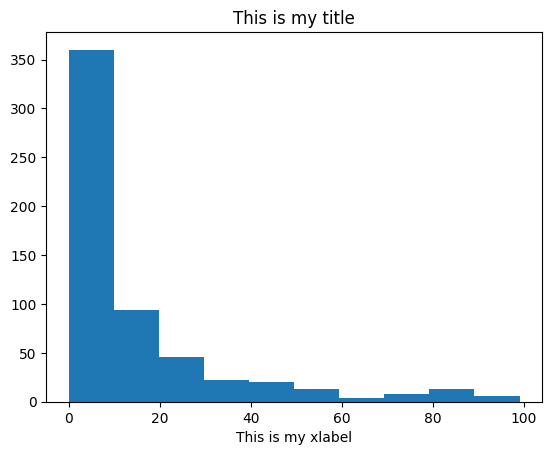

In [47]:

plt.hist(df['acous'])
plt.title("This is my title")
plt.xlabel("This is my xlabel");

In [48]:
df['dnce'].describe()

count    586.000000
mean      64.590444
std       13.128016
min       23.000000
25%       57.000000
50%       66.000000
75%       73.000000
max       97.000000
Name: dnce, dtype: float64

## Variance & Standard Deviation

Let's compute the spread of the energy levels of the music. Let's compute their variances.

First, using `pandas`:

In [53]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [54]:
df['dB'].var()

2.9233598786499813

In [55]:
df['bpm'].var()

594.9911175286602

Next, using `numpy`:

In [56]:
# Uh...
np.var(df['bpm'])

593.9757743246864

Finally, "by hand" using other `numpy` functions:

In [58]:
m = np.mean(df['bpm'])
m

118.8617747440273

In [72]:
sum((df['bpm'] - m) ** 2) / (len(df) - 1)

594.9911175286599

Ok, but what about the standard deviation?

In [70]:
(sum((df['bpm'] - m) ** 2) / (df.shape[0] - 1)) ** .5

24.392439761710182

In [71]:
df['bpm'].std()

24.39243976171019

## Five-number Summary

We can compute all of them pretty quickly with `.describe()`. Let's do that for the _speechiness_ of each song:

## Boxplot
Does the above summary agree with a boxplot?

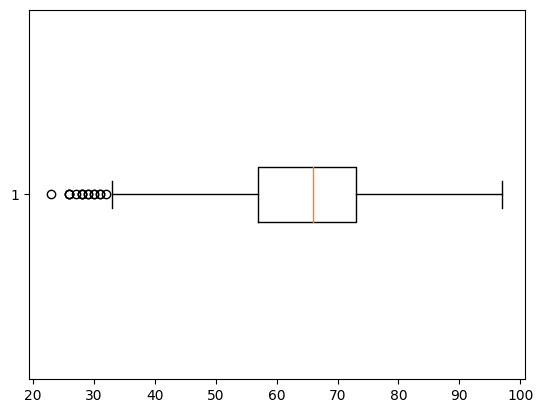

In [52]:
plt.boxplot(df['dnce'], vert=False);
#1.5 * iqr +/-

## Correlation
Let's take a look at the relationship between energy level and volume (dB).

First, let's plot them.

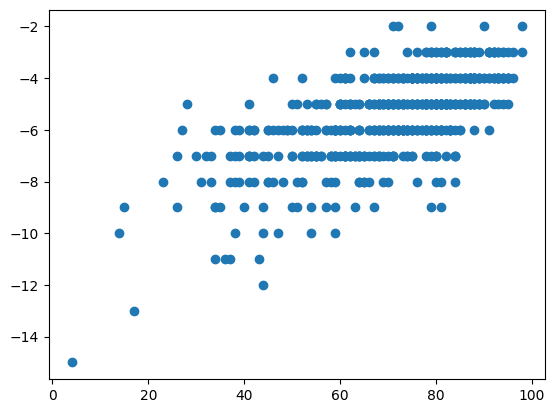

In [73]:
plt.scatter(df['nrgy'], df['dB'])

We can use `numpy` to compute the correlation coefficient, but it's in a weird format:

<Axes: >

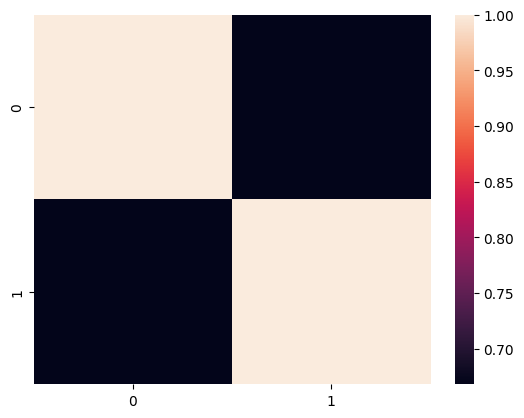

In [77]:
sns.heatmap(np.corrcoef(df['nrgy'], df['dB']))

Turns out, statisticians love to look at **correlation matrices**, which is just a big grid of correlations. Notice the diagonal of 1. We can make this easier in `pandas`:

In [8]:
#Try and define my own correlation function
import math
def own_correlation(x_set, y_set):
    y_bar = y_set.mean()
    x_bar = x_set.mean()
    mean_slope = y_bar/x_bar
    sum_slope_deviations = 0
    for i in range(len(y_set)):
        numerator = y_set.iloc[i] - y_bar
        denominator = x_set.iloc[i] - x_bar
        amt = pow((numerator/denominator) - mean_slope, 2)
        sum_slope_deviations += amt
    average_slope_deviations = sum_slope_deviations / len(y_set)
    return math.sqrt(average_slope_deviations)

print(own_correlation(df['nrgy'],df['dnce']))
print(own_correlation(df['dnce'],df['dnce']))

6.017864867443408
0.0


In [80]:
df.select_dtypes('number').corr()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.000000,-0.109518,-0.216868,0.086654,-0.173795,-0.137402,-0.123344,-0.212229,0.097651,0.011397,0.248080
bpm,-0.109518,1.000000,0.101311,-0.184556,0.048342,0.073514,0.002580,-0.027529,-0.128942,0.072840,-0.021826
nrgy,-0.216868,0.101311,1.000000,0.146669,0.667884,0.184692,0.409779,-0.145178,-0.569304,0.117526,-0.086296
dnce,0.086654,-0.184556,0.146669,1.000000,0.137060,-0.029445,0.489765,-0.179351,-0.257697,-0.027290,0.083559
dB,-0.173795,0.048342,0.667884,0.137060,1.000000,0.065603,0.355772,-0.173434,-0.349860,-0.044371,0.024581
live,-0.137402,0.073514,0.184692,-0.029445,0.065603,1.000000,0.026249,0.095488,-0.106835,0.136331,-0.085459
val,-0.123344,0.002580,0.409779,0.489765,0.355772,0.026249,1.000000,-0.266214,-0.256832,0.123224,0.026160
dur,-0.212229,-0.027529,-0.145178,-0.179351,-0.173434,0.095488,-0.266214,1.000000,0.085233,0.034684,-0.101198
acous,0.097651,-0.128942,-0.569304,-0.257697,-0.349860,-0.106835,-0.256832,0.085233,1.000000,-0.019505,0.014825
spch,0.011397,0.072840,0.117526,-0.027290,-0.044371,0.136331,0.123224,0.034684,-0.019505,1.000000,-0.051437


We can also use `seaborn`'s `heatmap()` function to make this a little nicer graphically.

In [ ]:
import seaborn as sns

<Axes: >

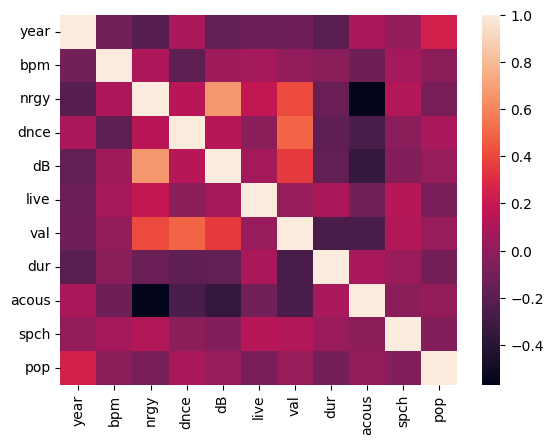

In [81]:
sns.heatmap(df.select_dtypes('number').corr())